**Date: 19/10/2018**



In [3]:
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from matplotlib.pyplot import figure
%matplotlib inline

## Visualisation of Probability Mass Function and Cumulative Distribution Function
Probability mass function (PMF) and Cumulative Distribution Function (CDF) is one of the crucial concepts in introductory statistics. The measures map each value of a discrete random variable to a real number ranging from 0 to 1. If you are a newbie in statistics, you may have hard time understanding the ideas at the beginning. While you are clueless on the mathematical expression of PMF and CDF, it may be helpful to visualise them and grab an intuitive idea of those monsters.

This notebook will briefly introduce the PMFs and CDFs of some typical discrete random variables. Typical random variables have their corresponding parameters. The parameters fully defines the characteristics of the random variable. For example, the characteristics of binomial distribution is governed by the number of trials (generally referred as n) and the probability of success in a trial (generally referred as p). 

Each session will include a visualisation of the PMF and CMF with varying parameters. By comparison, I hope you could grab an intuitive sense on how each paramter impacts the "shape"/ "behavior" of the distribution.

In [143]:
def vis_pmf(data, y_list, color_list, title, legend_list, upper_y):
    fig, ax = plt.subplots()
    yn_list = [np.insert(y, 0, 0) for y in y_list]
    bar_list = []
    for y, yn, color in zip(y_list, yn_list, color_list):
        bar = ax.bar(data[1:-1], y, color = color, alpha = 0.3, width = 0.6)
        bar_list.append(bar)
    # Adjust title
    ax.set_title(title, fontdict = {'fontsize': 20})
    # Adjust legend, line_list specify the lines showing up in legend
    ax.legend(bar_list,legend_list, loc = 1, fontsize = 14)
    # Adjust axis tick and label
    ax.xaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_label_text('Value of Random Variable', fontdict = {'fontsize': 16})
    ax.yaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_label_text('Probability', fontdict = {'fontsize': 16})
    # Adjust figure size
    fig.set_size_inches(10, 6)
    ax.set_ylim(0 , upper_y)
    
# x should include two additional terminal pt
# y should be list of cdf
def vis_cdf(data, y_list, color_list, title, legend_list):
    fig, ax = plt.subplots()
    yn_list = [np.insert(y, 0, 0) for y in y_list]
    line_list = []
    for y, yn, color in zip(y_list, yn_list, color_list):
        # Locate horizontal lines and vertical lines
        line = ax.vlines(x=data[1:-1], ymin=yn[:-1], ymax=yn[1:], color= color,
                        linestyle='dashed', zorder=1)
        line_list.append(line)
        # Locate scatter points
        ax.scatter(data[1:-1], y, color= color, s=60, zorder=2)
        ax.scatter(data[1:-1], yn[:-1], color='white', s=60, zorder=2,
                   edgecolor= color)
    for y, yn, color in zip(y_list, yn_list, color_list):
        ax.hlines(y=yn, xmin=data[:-1], xmax=data[1:], color= color, zorder=1)
    # Adjust title
    ax.set_title(title, fontdict = {'fontsize': 20})
    # Adjust legend, line_list specify the lines showing up in legend
    ax.legend(line_list, legend_list, loc = 4, fontsize = 14)
    # Adjust axis tick and label
    ax.xaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_label_text('Value of Random Variable', fontdict = {'fontsize': 16})
    ax.yaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_label_text('Cumulative Probability', fontdict = {'fontsize': 16})
    # Adjust figure size
    fig.set_size_inches(10, 6)

## 1. Binomial Random Variable

The Probability Mass Function of a Binomial Random Variable can be mathematically expressed in the following:
<br><br>
$$
\begin{equation}
X \sim Bin(n, p)
\end{equation}
$$

$$
\begin{equation}
P(X = k) = {n\choose k} \cdot p^k(1-p)^{n-k}
\end{equation}
$$ 
for $k = {0, 1 \ldots, n}$.
<br>

As you may notice, the distribution is defined by 2 parameters - `n` and `p`. `n` refers to the number of trials and `p` refers to probability of success in one trial. Below is the visualised PMF of binomial distributions with vary value of p. Binomial random variable counts the number of success `k` among n trials. The setting assumes each trial to be independent and identically distributed. If you perceive the setting as a number of `n` draws with `k` draws to be successful, it implicitly assumes there is a replacement for each draw.

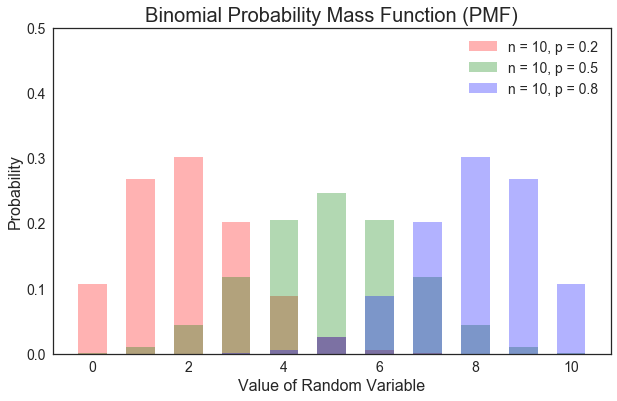

In [144]:
x = list(range(-1, 12))
y_1 = [binom.pmf(i, 10, 0.2) for i in x[1:-1]]
y_2 = [binom.pmf(i, 10, 0.5) for i in x[1:-1]]
y_3 = [binom.pmf(i, 10, 0.8) for i in x[1:-1]]
vis_pmf(data = x,
        y_list = [y_1, y_2, y_3],
        color_list = ['red', 'green', 'blue'],
        title = 'Binomial Probability Mass Function (PMF)',
        legend_list = ['n = 10, p = 0.2', 'n = 10, p = 0.5', 'n = 10, p = 0.8'],
        upper_y = 0.5)

* When `p` < 0.5, the distribution is positively skewed, meaning there is a long tail on the right hand side.
* When `p` > 0.5, the distribution is negatively skewed, meaning there is a long tail on the left hand side.
* The distribution turns out to be symmetric when `p` = 0.5
* In light of the symmetric property of binomial distribution under special condition, it can be conditionally used to approximate a Gaussian distribution

The Cumulative Distribution Function of a Binomial Random Variable can be mathematically expressed in the following:
<br><br>
$$
\begin{equation}
X \sim Bin(n, p)
\end{equation}
$$

$$
\begin{equation}
P(X \leq k) = \sum_{y=0}^{k}{n\choose y} \cdot p^y(1-p)^{n-y}
\end{equation}
$$ 
for $k = {0, 1 \ldots, n}$.
<br> 

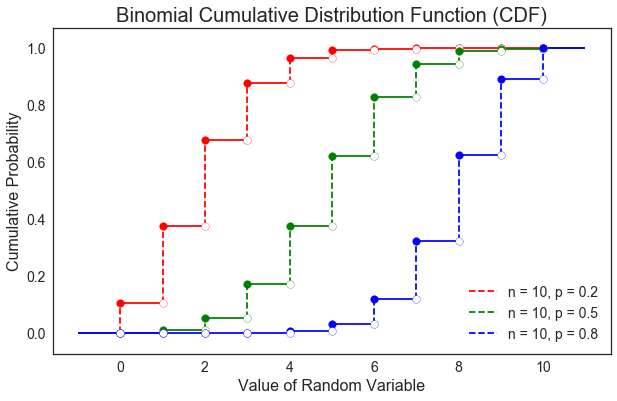

In [117]:
x = list(range(-1, 12))
y_1 = [binom.cdf(i, 10, 0.2) for i in x[1:-1]]
y_2 = [binom.cdf(i, 10, 0.5) for i in x[1:-1]]
y_3 = [binom.cdf(i, 10, 0.8) for i in x[1:-1]]
vis_cdf(data = x, 
        y_list = [y_1,y_2,y_3], 
        color_list = ['red', 'green', 'blue'],
        title = 'Binomial Cumulative Distribution Function (CDF)',
        legend_list = ['n = 10, p = 0.2', 'n = 10, p = 0.5', 'n = 10, p = 0.8']);

* CDF of Binomial random variable has no closed form
* Note that the CDF of discrete random variables is a collection of discrete lines (horizontal segment)
* Unlike PMF, the input of CDF is not confined to the sample space of the random variable
* Note that the CDF exhibits a steeper increase when p increases

## 2. Hypergeometric Random Variable

The Probability Mass Function of a Hypergeometric Random Variable can be mathematically expressed in the following:
<br><br>
$$
\begin{equation}
X \sim Hypergeometric(M, n, N)
\end{equation}
$$

$$
P(X = k) = \frac{{n \choose k} {M - n\choose N - k}}{{M \choose N}}$$
for $k = \max\{0,\, n_1 + n_2 - n_3\}, \ldots, \min\{n_1,\,n_2\}$.
<br>

The model setting of a Hypergeometric random variable is very similar to that of a Binomial random variable, except it assumes that there is no replacement for each draw. It renders each draw to be dependent of the preceeding draws. Because of such dependency, the distribution requires 3 paramters to be fully specified - namely `M`, `n`, `N`. `M` represents the total number of population, `n` is the number of target objects in the population, `N` is the number of draws.

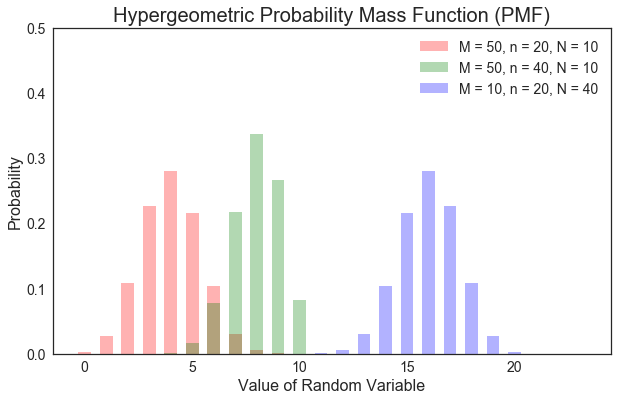

In [145]:
x = list(range(-1, 25))
y_1 = [hypergeom.pmf(i, 50, 20, 10) for i in x[1:-1]]
y_2 = [hypergeom.pmf(i, 50, 40, 10) for i in x[1:-1]]
y_3 = [hypergeom.pmf(i, 50, 20, 40) for i in x[1:-1]]
vis_pmf(data = x,
        y_list = [y_1, y_2, y_3],
        color_list = ['red', 'green', 'blue'],
        title = 'Hypergeometric Probability Mass Function (PMF)',
        legend_list = ['M = 50, n = 20, N = 10', 'M = 50, n = 40, N = 10', 'M = 10, n = 20, N = 40'],
        upper_y = 0.5)

* The maximum value of a Hypergeometric random variables depends on both number of draws `N` and number of target objects `n`
* For both red and green distribution, `N` is smaller than `n` so `N` imposes a limit on the maximum value (capped at 10)
* On the contrary, for blue distribution, `n` is smaller so it imposes a limit on the maximum value (capped at 20)

The Cumulative Distribution Function of a Hypergeometric Random Variable can be mathematically expressed in the following:
<br><br>
$$
\begin{equation}
X \sim Hypergeometric(M, n, N)
\end{equation}
$$

$$
P(X \leq k) = \sum_{y=\max\{0,\, n_1 + n_2 - n_3\}}^{k}{n\choose y} \frac{{n \choose y} {M - n\choose N - y}}{{M \choose N}}$$
for $k = \max\{0,\, n_1 + n_2 - n_3\}, \ldots, \min\{n_1,\,n_2\}$.
<br> 

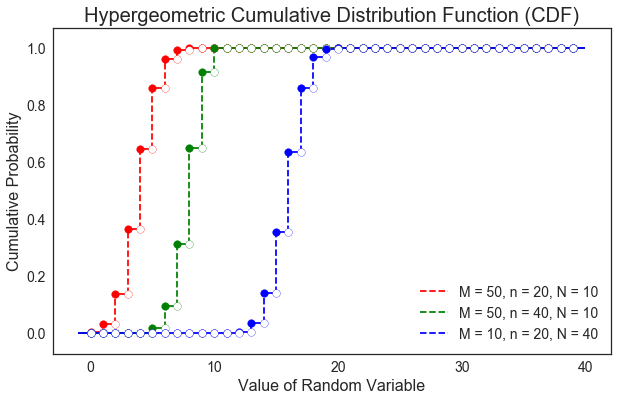

In [140]:
x = list(range(-1, 41))
y_1 = [hypergeom.cdf(i, 50, 20, 10) for i in x[1:-1]]
y_2 = [hypergeom.cdf(i, 50, 40, 10) for i in x[1:-1]]
y_3 = [hypergeom.cdf(i, 50, 20, 40) for i in x[1:-1]]
vis_cdf(data = x,
        y_list = [y_1, y_2, y_3],
        color_list = ['red', 'green', 'blue'],
        title = 'Hypergeometric Cumulative Distribution Function (CDF)',
        legend_list = ['M = 50, n = 20, N = 10', 'M = 50, n = 40, N = 10', 'M = 10, n = 20, N = 40'])

## 3. Poisson Random Variable

The Probability Mass Function of a Poisson Random Variable can be mathematically expressed in the following:
<br><br>
$$
\begin{equation}
X \sim Poisson(\lambda)
\end{equation}
$$

$$
P(X = k) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$$
for $k = 0, 1, 2, \ldots$.
<br>

Poisson random varible is commonly used for counting(e.g number of goal in a football match, number of typhoons in a given time period). Poisson distribution is characterised by a parameter $\lambda$. $\lambda$ captures the mean rate of the variables. For example, if $\lambda$ = 3, it implies that the Poisson random variables will have a high chance giving count values close to 3. It also implies that if you simulate the values in large sample size, the average of the simulated values would be very close to 3.

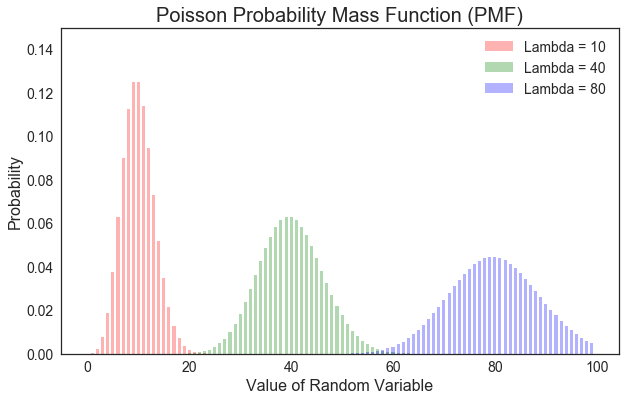

In [148]:
x = list(range(-1, 101))
y_1 = [poisson.pmf(i, 10) for i in x[1:-1]]
y_2 = [poisson.pmf(i, 40) for i in x[1:-1]]
y_3 = [poisson.pmf(i, 80) for i in x[1:-1]]
vis_pmf(data = x,
        y_list = [y_1, y_2, y_3],
        color_list = ['red', 'green', 'blue'],
        title = 'Poisson Probability Mass Function (PMF)',
        legend_list = ['Lambda = 10', 'Lambda = 40', 'Lambda = 80'],
        upper_y = 0.15)

* Increase in $\lambda$ would increase the mean of the distribution (characterised by the rightward shift)
* Increase in $\lambda$ would also increase the variance of the distribution (characterised by the larger dispersion)
* The PMF of a Poisson distribution assigns higher probability for values in neighborhood of the mean rate $\lambda$

The Cumulative Distribution Function of a Poisson Random Variable can be mathematically expressed in the following:
<br><br>
$$
\begin{equation}
X \sim Poisson(\lambda)
\end{equation}
$$

$$
P(X \leq k) = \sum_{y=0}^{k}{n\choose y} \frac{{e^{ - \lambda } \lambda ^y }}{{y!}}$$
for $k = 0, 1, 2, \ldots$.
<br> 

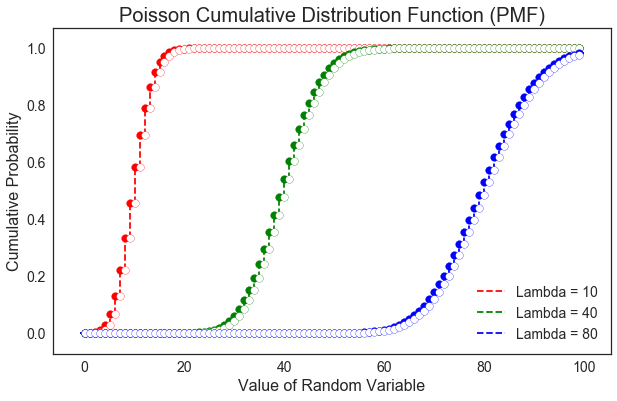

In [150]:
x = list(range(-1, 101))
y_1 = [poisson.cdf(i, 10) for i in x[1:-1]]
y_2 = [poisson.cdf(i, 40) for i in x[1:-1]]
y_3 = [poisson.cdf(i, 80) for i in x[1:-1]]
vis_cdf(data = x,
        y_list = [y_1, y_2, y_3],
        color_list = ['red', 'green', 'blue'],
        title = 'Poisson Cumulative Distribution Function (PMF)',
        legend_list = ['Lambda = 10', 'Lambda = 40', 'Lambda = 80'])

* Note that the distribution with smallest $\lambda$ has the steepest curve 

### Reference
1. Plotting Discrete CDF:    https://stackoverflow.com/questions/49661247/plotting-cdf-for-discrete-variable-step-plot-with-alternating-lines
2. Adjusting Axis Fontsize:    http://matplotlib.1069221.n5.nabble.com/Increasing-font-size-in-axis-ticks-td27274.html
3. Adjusting Legend for ax:    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html